# EXPLORING THE DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
%matplotlib inline
import pymysql
from sqlalchemy import create_engine
from scipy.stats import ttest_ind

'''The first I noticed when I arrive in Holland was : hey! The Dutch sure like their beer!
Ofcourse, I could only thank Heineken for that so far...
the second thing I noticed was their terrible weather... How can they 
even go outside, and most importantly, how can they drink their beer!
(I certainly need sun for that!)
So, I could help but wonder about the average 'Kees/Dieuwertje' drinking
behavior and wanted to see if I could find better understand it with data

First, let's look at the place of Beer in the Dutch total alcoholic beverage consumption
'''

## PLACE OF BEER AMONG ALCOHOLIC DRINKS IN NL

In [2]:
#Read
share = pd.read_csv('data/share_beer.csv')
share.head()

share.dtypes
share['Year'].astype(str)

0    1964
1    1984
2    2014
Name: Year, dtype: object

In [3]:
#Plot 
# plt.plot('Year','Beer_pct_total_alcohol',data=share,marker='x', markerfacecolor='blue', markersize=12, color='purple',linestyle='dashed', linewidth=4,label="Beer share")
# plt.plot( 'Year', 'Spirits_pct_total_alcohol', data=share, marker='x',markerfacecolor='olive',markersize=12, color='olive', linewidth=2,label="Spirits share")
# plt.plot( 'Year', 'Wine_pct_total_alcohol' , data=share, marker='x',markerfacecolor='skyblue',markersize=12, color='skyblue', linewidth=2, label="Wine share")
# plt.ylabel('Share in %', fontweight='bold', fontsize='12', verticalalignment='center')
# plt.xlabel('Years', fontweight='bold', fontsize='12', horizontalalignment='center')
# plt.tick_params(axis='x')




# plt.legend()
# plt.title('PLACE OF BEER AMONG TOTAL ALCOHOLIC BEVERAGES',fontweight='bold')

Text(0.5, 1.0, 'PLACE OF BEER IN TOTAL ALCOHOLIC BEVERAGES')

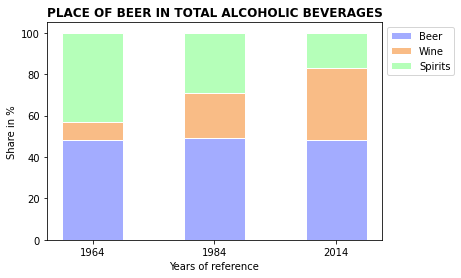

In [4]:
barWidth = 10
r=[10,30,50]
names = ('1964','1984','2014')
blueBars = share['Beer_pct_total_alcohol']
orangeBars = share['Wine_pct_total_alcohol']
greenBars = share['Spirits_pct_total_alcohol']
# Create blue Bars
plt.bar(r,blueBars , color='#a3acff' , edgecolor='white', width=barWidth, label='Beer')
# Create orange Bars
plt.bar(r,orangeBars , bottom=blueBars, color='#f9bc86', edgecolor='white', width=barWidth, label='Wine')
# # Create green Bars
plt.bar(r,greenBars , bottom=[i+j for i,j in zip(blueBars, orangeBars)], color='#b5ffb9', edgecolor='white', width=barWidth,label='Spirits')

plt.xticks(r, names)
plt.xlabel("Years of reference")
plt.ylabel("Share in %")

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)


plt.title('PLACE OF BEER IN TOTAL ALCOHOLIC BEVERAGES',fontweight='bold')

### Analysis
''' I took 3 years as reference, parted by 20 years to anlayze the share 
of the beer consumption in The Netherlands throughout the years.
This indication is not per capita but tells the proportion
of beer consumption among the total alcoholic beverage consumption
The original source presents these trends as 5-year averages 64, 84 and 2014 being the last year
of the range

These proportions shows that whilst the Total consumption of Wine seems to present an increase, and 
the cnsumption of Spirits a decrease, the share of beer consumption seem quite 
the same in The Netherlands. This supports the original thought about the Dutch 'liking their beer'

Let's looks further into the possible reasons that can makes us better understand the Dutch
beer-drinking pattern'''

### Transition line
''' Remember the second next thing I noticed about this country... yes, the weather.
Looking at this graph, I cannot help but wondering: does th eweather plays a role in the 
beer consumption at all? By the look at this one can only wonder if the
Dutch drink because the weather is crap. Le'ts find out
'''

## CONSUMPTION vs. WEATHER

In [5]:
#Read
beer = pd.read_csv('data/beer_NL.csv')
weather = pd.read_csv('data/weather_NL.csv')

beer.head()

,Entity,Year,Consumption,L_Beer
0,Netherlands,1961,1.88,37.6
1,Netherlands,1962,1.96,39.2
2,Netherlands,1963,2.20,44.0
3,Netherlands,1964,2.45,49.0
4,Netherlands,1965,2.59,51.8


In [6]:

sns.set_style("whitegrid")

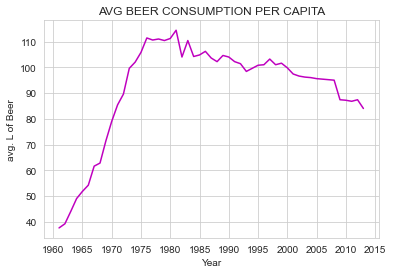

In [71]:
#Plot
years = mdates.YearLocator()   # every year
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax= beer.set_index('Year')['L_Beer'].plot(color='m')
plt.ylabel('avg. L of Beer')
plt.title("AVG BEER CONSUMPTION PER CAPITA")
plt.xticks([1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])

plt.show()



<AxesSubplot:xlabel='Year'>

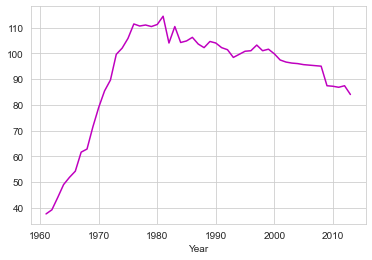

In [70]:
beer.set_index('Year')['L_Beer'].plot(color='m')


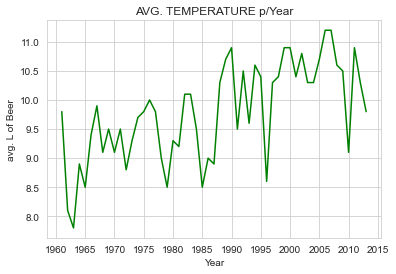

In [64]:
fig, ax = plt.subplots()
ax= weather.set_index('Year')['AVGTemp_Year'].plot(color='g')
plt.ylabel('avg. L of Beer')
plt.title("AVG. TEMPERATURE p/Year")
plt.xticks([1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])
plt.show()


Text(0.5, 1.0, 'AVG. SUMMER TEMPERATURE p/Year')

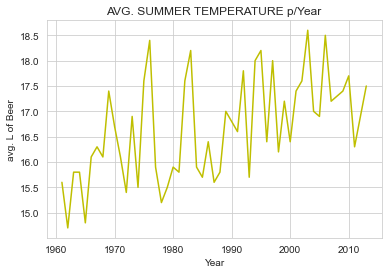

In [65]:
weather.set_index('Year')['AVGTemp_Summer'].plot(color='y')
plt.ylabel('avg. L of Beer')
plt.title("AVG. SUMMER TEMPERATURE p/Year")

Text(0.5, 1.0, 'AVG. RAINY DAYS p/Year')

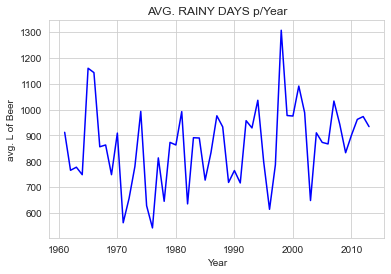

In [68]:
weather.set_index('Year')['Qty_precipitation'].plot(color='b')
plt.ylabel('avg. L of Beer')
plt.title("AVG. RAINY DAYS p/Year")

In [60]:
beer_weather = weather[['Year','AVGTemp_Year','AVGTemp_Summer','AVGTemp_Winter','Qty_precipitation']]
beer_weather['L_Beer'] = beer['L_Beer']
beer_weather = beer_weather.set_index('Year')


<ipython-input-60-c78617a3210f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beer_weather['L_Beer'] = beer['L_Beer']


array([[<AxesSubplot:title={'center':'AVGTemp_Year'}>,
        <AxesSubplot:title={'center':'AVGTemp_Summer'}>],
       [<AxesSubplot:title={'center':'AVGTemp_Winter'}>,
        <AxesSubplot:title={'center':'Qty_precipitation'}>],
       [<AxesSubplot:title={'center':'L_Beer'}>, <AxesSubplot:>]],
      dtype=object)

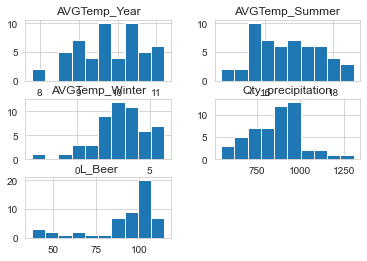

In [63]:
beer_weather.hist()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Beer consumption per capital vs. Summer weather avg p/year')

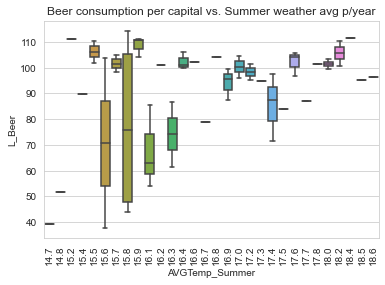

In [11]:
sns.set_style("whitegrid")
ax = sns.boxplot(weather['AVGTemp_Summer'],beer['L_Beer'])
plt.xticks(rotation=90)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("Beer consumption per capital vs. Summer weather avg p/year")


In [12]:
# x1= beer['Year']
# y1 =beer['L_Beer']
# x2 = weather['Year']
# y2 = weather['AVGTemp_Year']

# fig,plot = plt.subplots(2,2)

# plt.sca(plot[0])
# plt.plot(x1,y1,ls='--', label='Beer consumption')
# plt.set_title('Beer consumption')
# plt.set_xlabel('Years')
# plt.set_ylabel('consumption in L of beer')

# plt.sca(plot[1])
# plt.plot(weather['Year'],weather['AVGTemp_Year'],ls='',label="AVG Temp")
# plt.set_title('Average temperature per Year')
# plt.set_xlabel('Years')
# plt.set_ylabel('Temp in deg. Celsius')

# plt.sca(plot[2])
# plt.plot( weather['Year'], weather['Qty_precipitation'],label="Qty_Precipitation")
# plt.set_title('Rainy days per Year')
# plt.set_xlabel('Years')
# plt.set_ylabel('Precipitation in mm')

# plt.sca(plot[3])
# plt.plot( weather['Year'], weather['AVGTemp_Summer'] , label="Wine share")
# plt.set_title('Average Summer temperature per year')
# plt.set_xlabel('Years')
# plt.set_ylabel('Temp in Deg. Celsius')


# # plt.ylabel('Share in %', fontweight='bold', fontsize='12', verticalalignment='center')
# # plt.xlabel('Years', fontweight='bold', fontsize='12', horizontalalignment='center')
# # plt.tick_params(axis='x')


# plt.legend()
# plt.title('COMPARING DRINKING BEHAVIOR AGAINST WEATHER',fontweight='bold')

# plt.show()

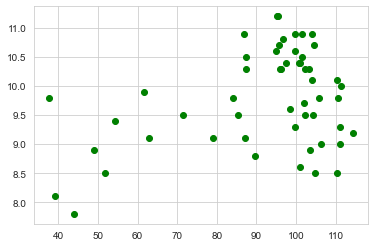

In [13]:
plt.scatter( beer['L_Beer'],weather['AVGTemp_Year'],color='g')

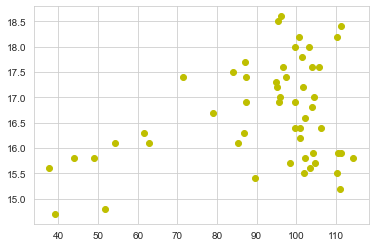

In [14]:
plt.scatter( beer['L_Beer'],weather['AVGTemp_Summer'],color='y')

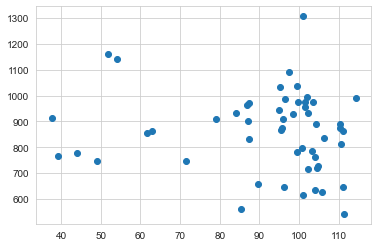

In [15]:
plt.scatter( beer['L_Beer'],weather['Qty_precipitation'])

In [16]:
#Analysis
#First I would like to calcutate some correlations:
print('Corr AVG temp vs. Beer :',weather['AVGTemp_Year'].corr(beer['L_Beer']) )
print('Corr AVG temp Winter vs. Beer :',weather['AVGTemp_Winter'].corr(beer['L_Beer'])  )
print('Corr AVG temp Summer vs. Beer :',weather['AVGTemp_Summer'].corr(beer['L_Beer'])  )

print('Corr Qty_precipitation vs. Beer :',weather['Qty_precipitation'].corr(beer['L_Beer']) )
print('Corr Nb_SummerDays vs. Beer :',weather['Nb_SummerDays'].corr(beer['L_Beer']) )
print('Corr Hours_Sunshine vs. Beer :',weather['Hours_Sunshine'].corr(beer['L_Beer']) )


Corr AVG temp vs. Beer : 0.36254392008612474
Corr AVG temp Winter vs. Beer : 0.2768665417267805
Corr AVG temp Summer vs. Beer : 0.3364363301250745
Corr Qty_precipitation vs. Beer : -0.11571073618004295
Corr Nb_SummerDays vs. Beer : 0.25041232330403645
Corr Hours_Sunshine vs. Beer : 0.15103887961938314


In [17]:
''' From the graphs, we cannot really see much of a strong relation.
From the Correlation calculations we see a relation between Summer/Summer Days and beer as well a negative 
one (though not strong as I thought it would be) between Precipitation and beer
So let's test our hypothesis:

Do the summerdays have an effect on the Dutch beer-drinking? Does the rain? Do the weather in general?
'''


" From the graphs, we cannot really see much of a strong relation.\nFrom the Correlation calculations we see a relation between Summer/Summer Days and beer as well a negative \none (though not strong as I thought it would be) between Precipitation and beer\nSo let's test our hypothesis:\n\nDo the summerdays have an effect on the Dutch beer-drinking? Does the rain? Do the weather in general?\n"

In [18]:
#Hypothesis1
#H0: Summer has no effect
#H1: Summer has an effect

stat, pv = ttest_ind(weather['AVGTemp_Year'],beer['L_Beer'], equal_var = False)

print('stat:',stat)
print('P-value:',pv)




stat: -29.879907862592283
P-value: 1.707199148659483e-34


In [19]:
#Hypothesis 2
#H0: Rain has no effect
#H1: Rain has an effect

stat, pv = ttest_ind(weather['Qty_precipitation'],beer['L_Beer'], equal_var = False)

print('stat:',stat)
print('P-value:',pv)



stat: 35.72741399909758
P-value: 4.116066838068686e-39


In [20]:
#Hypothesis 3
#H0: Weather in general has no effect
#H1: Weather in general has no effect

stat, pv = ttest_ind(weather['AVGTemp_Year'],beer['L_Beer'], equal_var = False)

print('stat:',stat)
print('P-value:',pv)



stat: -29.879907862592283
P-value: 1.707199148659483e-34


In [21]:
#Transition line:
''' It was nice to confirm that weather in general has some kind of relation to the beer drinking pattern but 
I have often hear that: Dutch are close to their money you know, 'Het geld groeit niet op mijn rug'. 
If this is true, can we see a relation between for ex. price variation and beer?
'''

" It was nice to confirm that weather in general has some kind of relation to the beer drinking pattern but \nI have often hear that: Dutch are close to their money you know, 'Het geld groeit niet op mijn rug'. \nIf this is true, can we see a relation between for ex. price variation and beer?\n"

# QUICK ANALYSIS OF PRICES

In [22]:
#Read
prices = pd.read_csv('data/Prices.csv')
beerCPI = pd.read_csv('data/Beer_CPI.csv')
breadCPI = pd.read_csv('data/Bread_CPI.csv')
cheeseCPI = pd.read_csv('data/MCE_CPI.csv')

Text(0.5, 1.0, 'COMPARING PRICE in TIME')

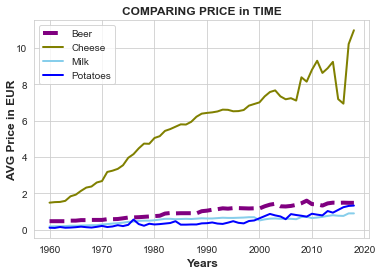

In [23]:
#Plot
plt.plot('Year','Beer_EUR',data=prices, color='purple',linestyle='dashed', linewidth=4,label="Beer")
plt.plot( 'Year', 'Cheese_EUR', data=prices,  color='olive', linewidth=2,label="Cheese")
plt.plot( 'Year', 'Milk_EUR' , data=prices, color='skyblue', linewidth=2, label="Milk")
plt.plot( 'Year', 'Potatoes_EUR', data=prices,color='blue', linewidth=2, label="Potatoes")
plt.ylabel('AVG Price in EUR', fontweight='bold', fontsize='12', verticalalignment='center')
plt.xlabel('Years', fontweight='bold', fontsize='12', horizontalalignment='center')


plt.legend()
plt.title('COMPARING PRICE in TIME',fontweight='bold')

In [24]:
'''Well, what can we say: Dutch like cheese...
But apart from that and from a first glance at this graph of the price of the fixed basket of 
goods such as beer/cheese, Milk, we can see that
beer is situates among (and even above) daily like products such as Potatoes and 
Milk.
this is teling us that the Dutch people are paying in average of their avergae basket
consumption, the same or even slightly higher price for their beer

Of course this data does not take in consideration the quality of the products in time, so let's 
look at the price index for these products to see their variation
please note that whilst there is a price index for beer alone as a subvategory of
product, CBS has not one for potatos.
Chesse milk are in the same category.I have assumed that the Dutch people have
an equally need for potatos than for bread, therefore I have added CPI of bread

It is also important to note that the data found is only for the period 
1996-2019. I took it and analyze it as is (even though the range is moved, but just for the purpose
of understanding the variation of the price change)
'''

"Well, what can we say: Dutch like cheese...\nBut apart from that and from a first glance at this graph of the price of the fixed basket of \ngoods such as beer/cheese, Milk, we can see that\nbeer is situates among (and even above) daily like products such as Potatoes and \nMilk.\nthis is teling us that the Dutch people are paying in average of their avergae basket\nconsumption, the same or even slightly higher price for their beer\n\nOf course this data does not take in consideration the quality of the products in time, so let's \nlook at the price index for these products to see their variation\nplease note that whilst there is a price index for beer alone as a subvategory of\nproduct, CBS has not one for potatos.\nChesse milk are in the same category.I have assumed that the Dutch people have\nan equally need for potatos than for bread, therefore I have added CPI of bread\n\nIt is also important to note that the data found is only for the period \n1996-2019. I took it and analyze it 

Text(0.5, 1.0, 'CPI Beer, Bread, Cheese')

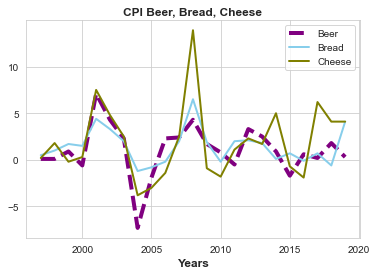

In [25]:
#Analysis
'''I was curious to compare it to the consumper price index for these goods
and see the inflation on their respective prices. this just gives me an idea of 
the importance that beer can have in the daily consumer basket of
an average Dutch
'''

plt.plot('Year','Y0Y_changeD%',data=beerCPI, color='purple',linestyle='dashed', linewidth=4,label="Beer")
plt.plot( 'Year', 'YoY_change%', data=breadCPI,  color='skyblue', linewidth=2,label="Bread")
plt.plot( 'Year', 'YoY_change%' , data=cheeseCPI, color='olive', linewidth=2, label="Cheese")

plt.xlabel('Years', fontweight='bold', fontsize='12', horizontalalignment='center')


plt.legend()
plt.title('CPI Beer, Bread, Cheese',fontweight='bold')

In [26]:
#I would like to quickly test my hypothesis based on fixed prices 
#to answer whether prices have an influence on consumption

#H0: Average price of beer has no affect 
#H1: it has an effect


stat, pv = ttest_ind(prices['Beer_EUR'],beer['L_Beer'], equal_var = False)

print('stat:',stat)
print('P-value:',pv)
#The P value seems very low. Price doesn't seem to matter when it comes to beer

stat: -33.11743778006099
P-value: 1.2229083117551503e-36


In [27]:
'''So if money matters for the Dutch, as the expression wants to make us think about,
but the prices don't seem to be a strong influence, can perhaps the unemployment be a factor? 
'''

"So if money matters for the Dutch, as the expression wants to make us think about,\nbut the prices don't seem to be a strong influence, can perhaps the unemployment be a factor? \n"

# CONSUMPTION vs. UNEMPLOYMENT

In [28]:
#Read
unemp = pd.read_csv('data/unemp_rate.csv')
unemp.head()

,Gender,Year,Total_LaborForce_x1000,Working,Partially_NotWorking,Pct
0,Mannen en vrouwen,1960,4240,4193,47,1.1
1,Mannen en vrouwen,1961,4257,4221,37,0.9
2,Mannen en vrouwen,1962,4353,4316,37,0.8
3,Mannen en vrouwen,1963,4428,4387,41,0.9
4,Mannen en vrouwen,1964,4469,4432,37,0.8


Text(0.5, 1.0, 'Unemployment rate p/Year')

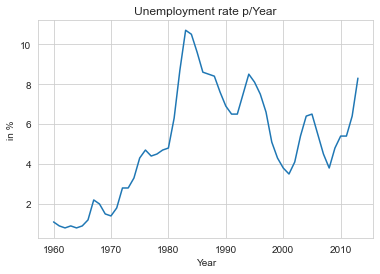

In [72]:
#Plot

unemp_all = unemp.loc[(unemp['Gender']=='Mannen en vrouwen')]
unemp_all.set_index('Year')['Pct'].plot()
plt.ylabel('in %')
plt.title("Unemployment rate p/Year")

Text(0.5, 1.0, 'AVG BEER CONSUMPTION PER CAPITA')

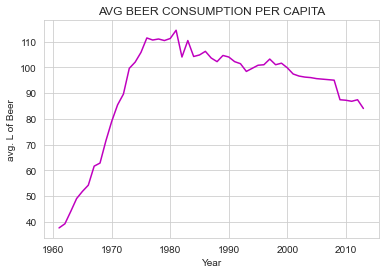

In [74]:
beer.set_index('Year')['L_Beer'].plot(color = 'm')
plt.ylabel('avg. L of Beer')
plt.title("AVG BEER CONSUMPTION PER CAPITA")

In [31]:
#Analysis

'''Looking at this graph we see a much more 'direct' relatin beteen 
beer and unemployment. Le'ts take a look at the period where the unemployment for both
man and women was the highest.
'''

print('Max unemployment :',unemp_all['Pct'].max())

print('Mean unemployment:',unemp_all['Pct'].mean())
unemp_all.loc[(unemp_all['Pct']> 9)]

Max unemployment : 10.7
Mean unemployment: 5.037037037037037


,Gender,Year,Total_LaborForce_x1000,Working,Partially_NotWorking,Pct
23,Mannen en vrouwen,1983,5458,4873,585,10.7
24,Mannen en vrouwen,1984,5460,4886,574,10.5
25,Mannen en vrouwen,1985,5521,4991,530,9.6


In [32]:
''' So this could explain the 'plateau' of the curve. and perhaps the first 
decrease. We could test the hypothesis.

So we have noticed, that while and the weather hve an impact, the unemployment 
seems to have a more important one. But could this mean that only the 
monetary aspect of it has an influence on the drinking pattern, or could it also mean that 
the mood/happiness related to it does?

Let's check the share of the people declaring to be happy
'''

" So this could explain the 'plateau' of the curve. and perhaps the first \ndecrease. We could test the hypothesis.\n\nSo we have noticed, that while and the weather hve an impact, the unemployment \nseems to have a more important one. But could this mean that only the \nmonetary aspect of it has an influence on the drinking pattern, or could it also mean that \nthe mood/happiness related to it does?\n\nLet's check the share of the people declaring to be happy\n"

# CONSUMPTION vs. HAPPINESS

In [33]:
#read
happy = pd.read_csv('data/happypeople.csv')

In [34]:
happy.head()

,Year,Share_of_happy
0,1973,93.0
1,1975,86.2
2,1976,90.5
3,1977,91.7
4,1978,93.2


Text(0.5, 1.0, 'SHARE of SELF DECLARED HAPPY PEOPLE')

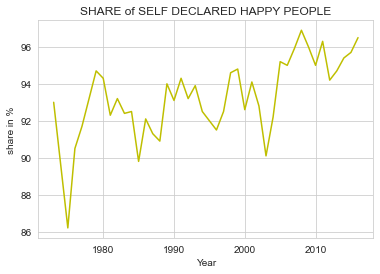

In [77]:
## PLOTTING 

'''For this dataset, I only have information since 1973
So, et's rearrange our beer dataset in order to compare this
'''
beer73 = beer.loc[(beer['Year']>1972)]

happy.set_index('Year')['Share_of_happy'].plot(color='y')
plt.ylabel('share in %')
plt.title("SHARE of SELF DECLARED HAPPY PEOPLE")

Text(0.5, 1.0, 'AVG BEER CONSUMPTION PER CAPITA')

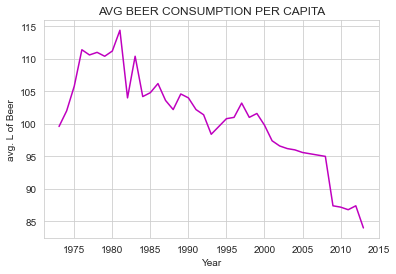

In [75]:
beer73.set_index('Year')['L_Beer'].plot(color = 'm')
plt.ylabel('avg. L of Beer')
plt.title("AVG BEER CONSUMPTION PER CAPITA")

In [37]:
'''It seems that the bigger share of happy people, the smaller the 
consumption of beer.
Of course, we assume here that the people answering this survey is all in
age of drink a beer and representative of the whole population
'''



'It seems that the bigger share of happy people, the smaller the \nconsumption of beer.\nOf course, we assume here that the people answering this survey is all in\nage of drink a beer and representative of the whole population\n'

# In Conclusion

In [38]:
#This data does not give us the answer of why do the Dutch people drink beer
#but show us some relations that could help determine when they do.

#there are some other factors, not chcked in this analysis such as :

#1980 Beatrix coronation -Worst manifestations the country has had(during peace times) 
#1980 Breweries closing in NL. only 15 active Dutch (vs.722 most of them situated in NoordBrabant 159,
#Noord Holland 136 and Zuid Holland 100 )
#99% of the beer drunk in the Netherlands consisted 
#of lager (cheap and tasteless).
#1960-75 economic boom after the war until oil crisis
#oil crisis 73-79 =>'plateau' from 1975
#1982 NL not in the world cup => not reflected hier
#1981 NL in worldcup but not reflected hier 
#oil crisis 2008

#Rise of micro breweries
